In [3]:
#installs
#!pip install plotly
#!pip install "notebook>=5.3" "ipywidgets>=7.2"


# Imports

In [291]:
#webscraping
import requests
from bs4 import BeautifulSoup

import pandas as pd


url = 'https://www.federalreserve.gov/releases/h41/20200514/h41.htm'
get = requests.get(url)
bs = BeautifulSoup(get.content, 'html.parser')
print(get.ok)

dates = {'01' : ['02', '09','16','23','30'],
        '02' : ['06', '13', '20' , '27'],
        '03' : ['05', '12', '19' , '26'],
        '04' : ['02', '09', '16', '23', '30'],
         '05' : ['07', '14', '21'] #has current
         
        }

urls = []

# good links
# 'https://www.federalreserve.gov/releases/h41/current/h41.htm',
#     'https://www.federalreserve.gov/releases/h41/20200507/h41.htm',
#     'https://www.federalreserve.gov/releases/h41/20200514/h41.htm',
#     'https://www.federalreserve.gov/releases/h41/20200521/h41.htm'

for d in dates.keys():
    for v in dates[d]:
        urls.append('https://www.federalreserve.gov/releases/h41/2020{}{}/h41.htm'.format(d, v))
urls.append('https://www.federalreserve.gov/releases/h41/current/h41.htm')

True


In [359]:
dfs = []
for url in urls:
    bs = getSoup(url)
    data = bs.select('.H41Release > tr > td > p')
    if (len(data) == 0):
        data = bs.select('.H41Release td p')
        if (len(data) == 0):
            print('no data')
            print(url)
            break;
    features = getFeatures(bs)
    clean_features = cleanFeatures(features)
    clean_data = cleanData(data, len(clean_features[2]))
    dfs.append(createDataFrame(clean_features, data))
df = dfs[0]
for d in dfs[1:]:
    df = df.append(d, ignore_index=False)
df['Date'] = pd.to_datetime(df['Date'], format='%B %d, %Y', errors='ignore')
df.set_index('Date', inplace=True)

all_dfs = [df]
columnNames = df.columns
df.fillna('0', inplace=True)
for df in all_dfs:
    for c in columnNames:
        df[c] = df[c].apply(removeUnicode)
        df[c] = df[c].apply(removePlus)
        df[c] = df[c].apply(removeComma)
        df[c] = df[c].astype(int)
#pd.to_datetime('13000101', format='%Y%m%d', errors='coerce')

January 2, 2020
January 9, 2020
January 16, 2020
January 23, 2020
January 30, 2020
February 6, 2020
February 13, 2020
February 20, 2020
February 27, 2020
March 5, 2020
March 12, 2020
March 19, 2020
March 26, 2020
April 2, 2020
April 9, 2020
April 16, 2020
April 23, 2020
April 30, 2020
May 7, 2020
May 14, 2020
May 21, 2020
May 28, 2020


In [358]:
pd.to_datetime('May 28, 2020', format='%B %d, %Y')

Timestamp('2020-05-28 00:00:00')

In [360]:
df.head()

,Bills2,Central bank liquidity swaps8,Federal agency debt securities2,Float,Foreign currency denominated assets10,Foreign official,Gold stock,Inflation compensation3,Loans,Money Market Mutual Fund Liquidity Facility,...,Reserve Bank credit,Seasonal credit,Secondary credit,Securities held outright1,Special drawing rights certificate account,Total factors supplying reserve funds,Treasury currency outstanding11,U.S. Treasury securities,Unamortized discounts on securities held outright5,Unamortized premiums on securities held outright5
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,169525,3728,2347,-643,20792,0,11041,25474,42,0,...,4134215,10,0,3739957,5200,4221387,50138,2328933,-13284,124577
2020-01-09,184527,3728,2347,-124,20632,0,11041,25453,2,0,...,4110819,2,0,3758738,5200,4197813,50120,2347714,-13278,124474
2020-01-16,195029,59,2347,-60,20607,0,11041,25485,9,0,...,4137142,0,0,3769300,5200,4224124,50134,2362635,-13221,124410
2020-01-23,210031,54,2347,-158,20526,0,11041,25467,0,0,...,4107163,0,0,3782010,5200,4194078,50148,2381020,-13272,123974
2020-01-30,232534,51,2347,-675,20499,0,11041,25448,34,0,...,4112398,0,0,3798743,5200,4199300,50162,2409108,-13306,123527


In [ ]:
df.head()

In [316]:
df.head()

,Bills2,Central bank liquidity swaps8,Federal agency debt securities2,Float,Foreign currency denominated assets10,Foreign official,Gold stock,Inflation compensation3,Loans,Money Market Mutual Fund Liquidity Facility,...,Reserve Bank credit,Seasonal credit,Secondary credit,Securities held outright1,Special drawing rights certificate account,Total factors supplying reserve funds,Treasury currency outstanding11,U.S. Treasury securities,Unamortized discounts on securities held outright5,Unamortized premiums on securities held outright5
Date,,,,,,,,,,,,,,,,,,,,,
"January 2, 2020","169,525","3,728","2,347",-643,"20,792",NaN,"11,041","25,474",42,NaN,...,"4,134,215",10,0,"3,739,957","5,200","4,221,387","50,138","2,328,933","-13,284","124,577"
"January 9, 2020","184,527","3,728","2,347",-124,"20,632",NaN,"11,041","25,453",2,NaN,...,"4,110,819",2,0,"3,758,738","5,200","4,197,813","50,120","2,347,714","-13,278","124,474"
"January 16, 2020","195,029",59,"2,347",-60,"20,607",NaN,"11,041","25,485",9,NaN,...,"4,137,142",0,0,"3,769,300","5,200","4,224,124","50,134","2,362,635","-13,221","124,410"
"January 23, 2020","210,031",54,"2,347",-158,"20,526",NaN,"11,041","25,467",0,NaN,...,"4,107,163",0,0,"3,782,010","5,200","4,194,078","50,148","2,381,020","-13,272","123,974"
"January 30, 2020","232,534",51,"2,347",-675,"20,499",NaN,"11,041","25,448",34,NaN,...,"4,112,398",0,0,"3,798,743","5,200","4,199,300","50,162","2,409,108","-13,306","123,527"


In [317]:
df.iloc[0]

Bills2                                                                   169,525
Central bank liquidity swaps8                                              3,728
Federal agency debt securities2                                            2,347
Float                                                                       -643
Foreign currency denominated assets10                                     20,792
Foreign official                                                             NaN
Gold stock                                                                11,041
Inflation compensation3                                                   25,474
Loans                                                                         42
Money Market Mutual Fund Liquidity Facility                                  NaN
Mortgage-backed securities4                                            1,408,677
Net portfolio holdings of Commercial Paper Funding Facility II LLC7          NaN
Net portfolio holdings of Co

In [279]:
bs = getSoup('https://www.federalreserve.gov/releases/h41/20200319/h41.htm')
data = bs.select('.H41Release td p')

In [280]:
data

[<p>March 19, 2020</p>,
 <p>4,463,041</p>,
 <p>+  241,451</p>,
 <p>+  534,834</p>,
 <p>4,629,659</p>,
 <p>3,929,025</p>,
 <p>+   38,893</p>,
 <p>+  147,655</p>,
 <p>4,009,794</p>,
 <p>2,556,247</p>,
 <p>+   40,307</p>,
 <p>+  380,731</p>,
 <p>2,640,771</p>,
 <p>   321,043</p>,
 <p>+    6,430</p>,
 <p>+  321,043</p>,
 <p>   321,043</p>,
 <p>2,075,200</p>,
 <p>+   32,062</p>,
 <p>+   36,189</p>,
 <p>2,154,496</p>,
 <p>   133,939</p>,
 <p>+    1,515</p>,
 <p>+   18,785</p>,
 <p>   138,653</p>,
 <p>    26,066</p>,
 <p>+      302</p>,
 <p>+    4,715</p>,
 <p>    26,579</p>,
 <p>     2,347</p>,
 <p>         0</p>,
 <p>-       62</p>,
 <p>     2,347</p>,
 <p>1,370,430</p>,
 <p>-    1,416</p>,
 <p>-  233,015</p>,
 <p>1,366,676</p>,
 <p>   128,537</p>,
 <p>+    4,078</p>,
 <p>-    7,841</p>,
 <p>   138,294</p>,
 <p>   -12,887</p>,
 <p>+      507</p>,
 <p>+      277</p>,
 <p>   -12,036</p>,
 <p>   388,806</p>,
 <p>+  189,505</p>,
 <p>+  388,806</p>,
 <p>   441,945</p>,
 <p>     6,687</p>,
 <p>+ 

# Methods

In [225]:
#returns beautifulsoup of html page 
def getSoup(url):
    get = requests.get(url)
    return BeautifulSoup(get.content, 'html.parser')
    

In [220]:
def getFeatures(bs):
    #identify what we want from each table
    dids = {}
    tables_bs = bs.select('table')
    maxtable = len(tables_bs)
    #starts at table 1 but tables_bs is 0 indexed
    curtable = int(tables_bs[0].find('th').attrs['id'].strip('t').split('r')[0])

    features = {}

    while curtable <= maxtable:
        #last table row
        #all data elements in row
        columns = len(tables_bs[curtable - 1].findAll('tr')[-1].findAll('td'))
        rows = len(tables_bs[curtable -1].findAll('tr'))
        dids[curtable] = []
        #get all features for table
        features[curtable] = tables_bs[curtable - 1].findAll('th', {'headers' : 't{}c0'.format(curtable)})
        rows = len(features[curtable])
        #get all data for table
    #     for column in range(1, columns):
    #         #append column of data to list for that table
    #         dids[curtable].append(bs.select('#t{}c{}'.format(curtable, column)))

        curtable += 1
    return features

In [288]:
def cleanData(data, numFeatures):
    #skip date
    dataM = data[1:]
    dvals = {}
    dfvals = {'Date' : data[0].text.strip()}
    print(dfvals['Date'])
    cleanData = []
    for index in range(numFeatures):
        cleanData.append(dataM[4 * index + 3].text.strip())
    return cleanData

In [246]:
def createDataFrame(cleaned_features, data):
    #first entry is the data
    dataM = data[1:]
    #create df from cleaned_features
    dvals = {}
    dfvals = {'Date' : data[0].text.strip()}
    keys = cleaned_features[2] #table2
    for index, key in enumerate(keys):
        #for index, value in enumerate(cleaned_features[key]): #value = name of feature
        #    print(dataM[4 * index + 3])
        #    print(type(value))
        dfvals[key] = [dataM[4 * index + 3].text.strip()]
        #runningindex += 4 * len(cleaned_features[2])
    return pd.DataFrame(data=dfvals)

In [300]:
def cleanFeatures(features):
    cleaned_features = {}
    for key in features:
        #print(key)
        cleaned_features[key] = []
        for value in features[key]:
            if (len(value.text) != 0): #not empty row
                cleaned_features[key].append(value.text.strip('\n !@#$%^&*()_'))
                #print('-- {} : {} --'.format(value.text, dataM[4 * index + 3].text.strip()))
            else: #do nothing
                continue
    return cleaned_features


In [319]:
#remove unic issues '\xa0'
def removeUnicode(x):
    if '\xa0' in str(x):
        return x.replace('\xa0', '')
    else:
        return x
def removePlus(x):
    if '+' in str(x):
        return x.replace('+', '')
    else:
        return x
def removeComma(x):
    if ',' in str(x):
        return x.replace(',', '')
    else:
        return x

ValueError: invalid literal for int() with base 10: '169,525'

In [324]:
df.dtypes

Bills2                                                                 object
Central bank liquidity swaps8                                          object
Federal agency debt securities2                                        object
Float                                                                  object
Foreign currency denominated assets10                                  object
Foreign official                                                       object
Gold stock                                                             object
Inflation compensation3                                                object
Loans                                                                  object
Money Market Mutual Fund Liquidity Facility                            object
Mortgage-backed securities4                                            object
Net portfolio holdings of Commercial Paper Funding Facility II LLC7    object
Net portfolio holdings of Corporate Credit Facilities LLC7      

# essential

In [215]:
data = bs.select('.H41Release > tr > td > p')

In [216]:
#identify what we want from each table
dids = {}
tables_bs = bs.select('table')
maxtable = len(tables_bs)
#starts at table 1 but tables_bs is 0 indexed
curtable = int(tables_bs[0].find('th').attrs['id'].strip('t').split('r')[0])

features = {}

while curtable <= maxtable:
    #last table row
    #all data elements in row
    columns = len(tables_bs[curtable - 1].findAll('tr')[-1].findAll('td'))
    rows = len(tables_bs[curtable -1].findAll('tr'))
    dids[curtable] = []
    #get all features for table
    features[curtable] = tables_bs[curtable - 1].findAll('th', {'headers' : 't{}c0'.format(curtable)})
    rows = len(features[curtable])
    #get all data for table
#     for column in range(1, columns):
#         #append column of data to list for that table
#         dids[curtable].append(bs.select('#t{}c{}'.format(curtable, column)))
    
    curtable += 1

# Data

## Values

In [150]:
#<tr> with <td> have <th> that are the names for the data
#data in <td> are in <p>
#first table with tr p has date
data = bs.select('.H41Release > tr > td > p')


In [288]:
count = 0
for d in data:
    if '1,826,212' in d.text:
        break;
    count += 1

In [263]:
def findstartlocation(string, vals=data):
    count = 0
    for d in vals:
        if string in d.text:
            break;
        count += 1
    return count

In [289]:
count

332

# Visualization

In [339]:
c

'Bills2'

In [341]:
df[c].index

Index(['January 2, 2020', 'January 9, 2020', 'January 16, 2020',
       'January 23, 2020', 'January 30, 2020', 'February 6, 2020',
       'February 13, 2020', 'February 20, 2020', 'February 27, 2020',
       'March 5, 2020', 'March 12, 2020', 'March 19, 2020', 'March 26, 2020',
       'April 2, 2020', 'April 9, 2020', 'April 16, 2020', 'April 23, 2020',
       'April 30, 2020', 'May 7, 2020', 'May 14, 2020', 'May 21, 2020',
       'May 28, 2020'],
      dtype='object', name='Date')

/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


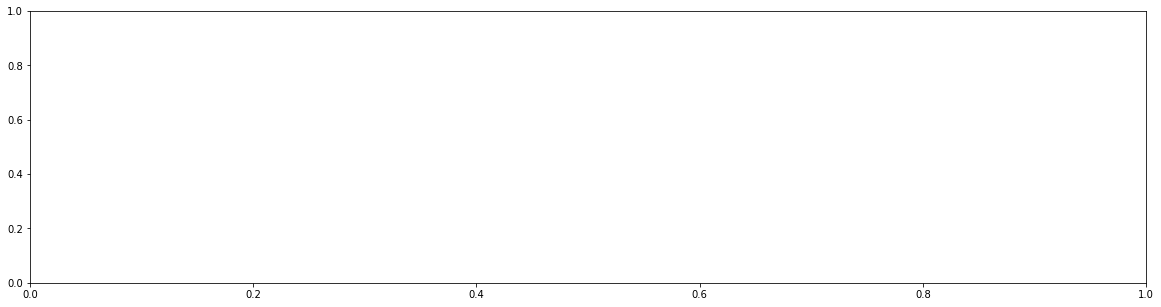

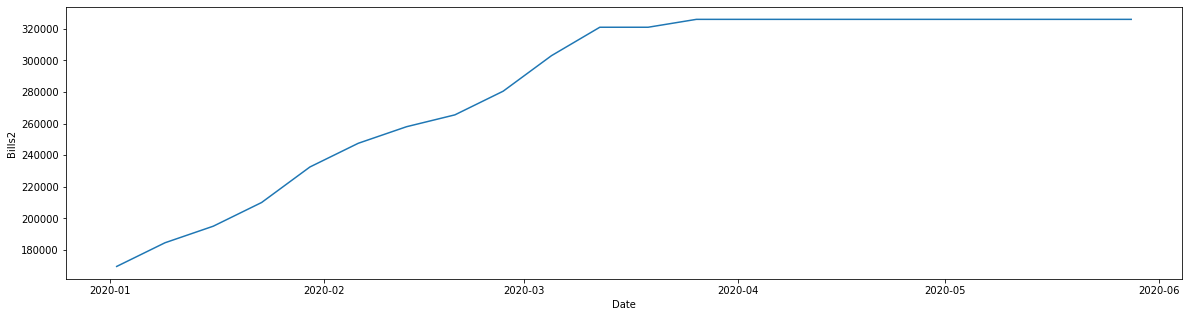

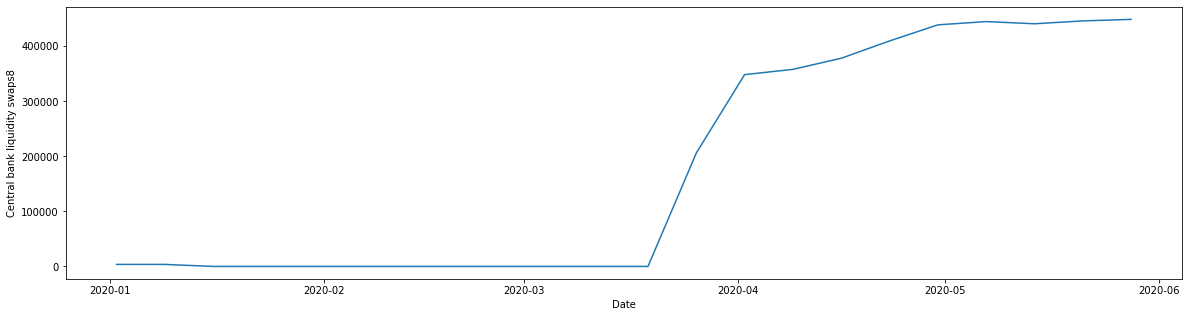

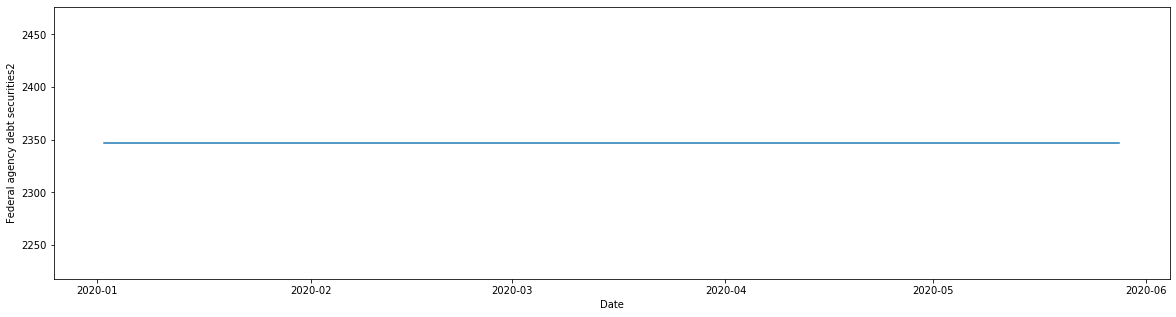

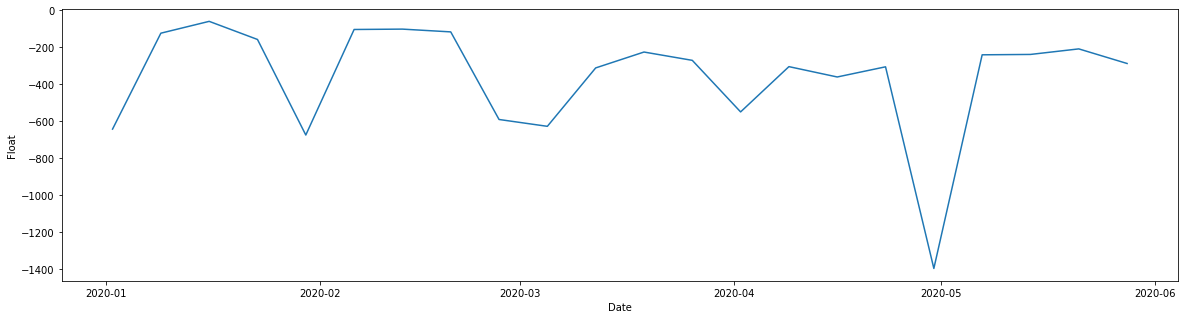

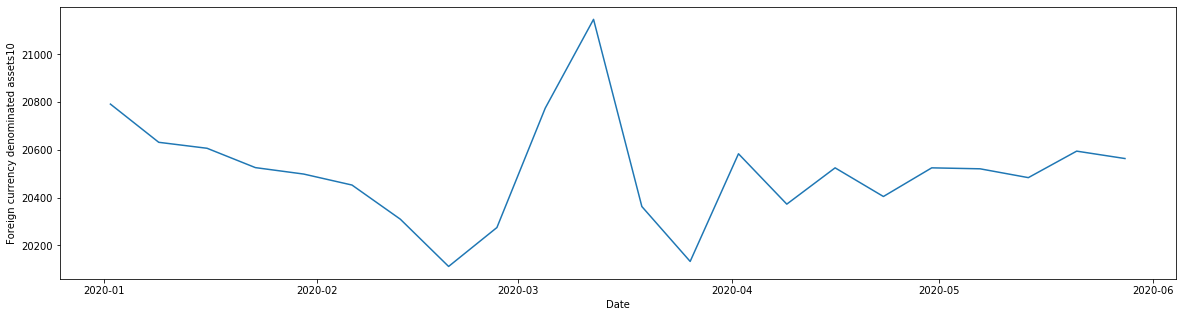

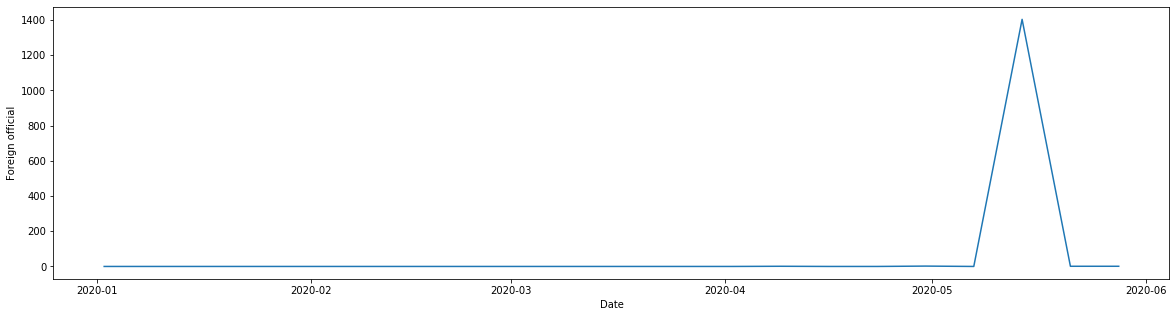

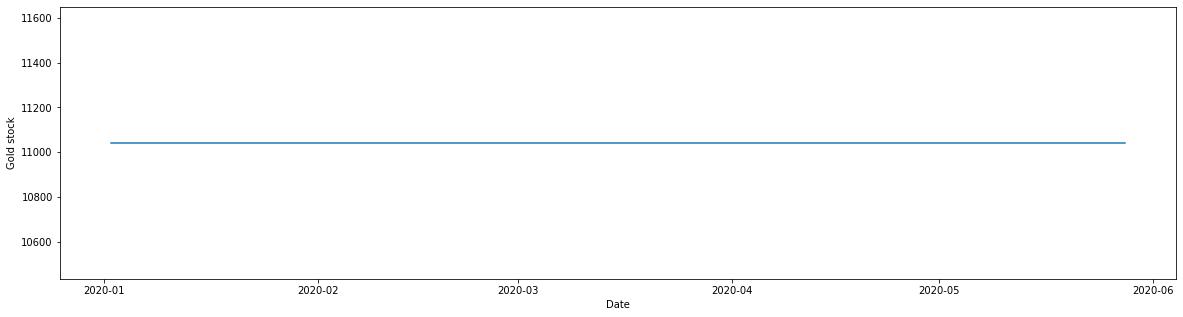

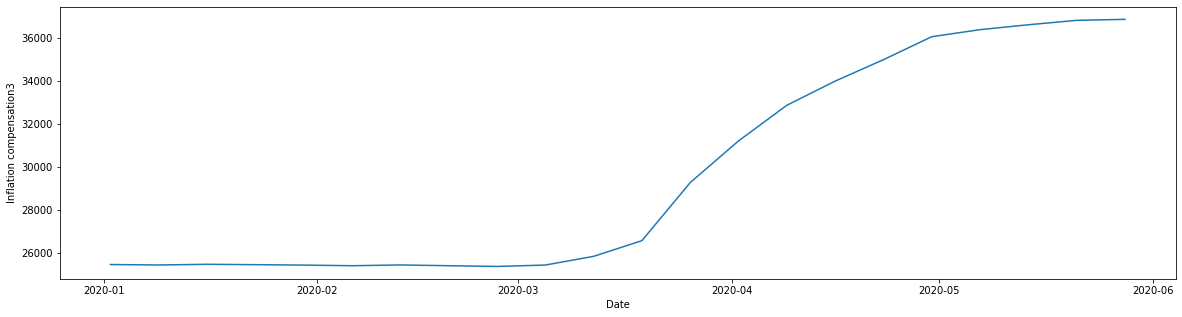

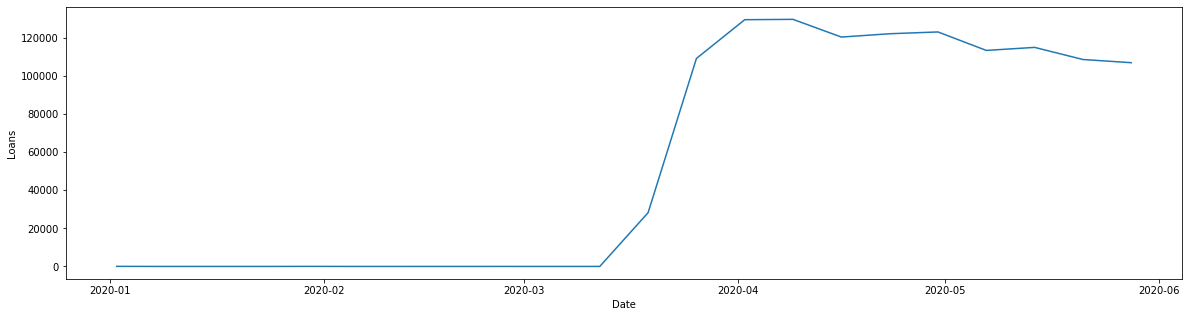

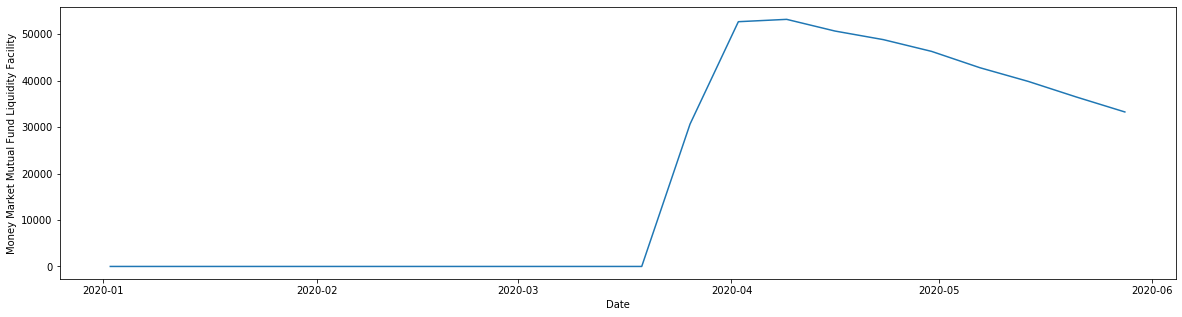

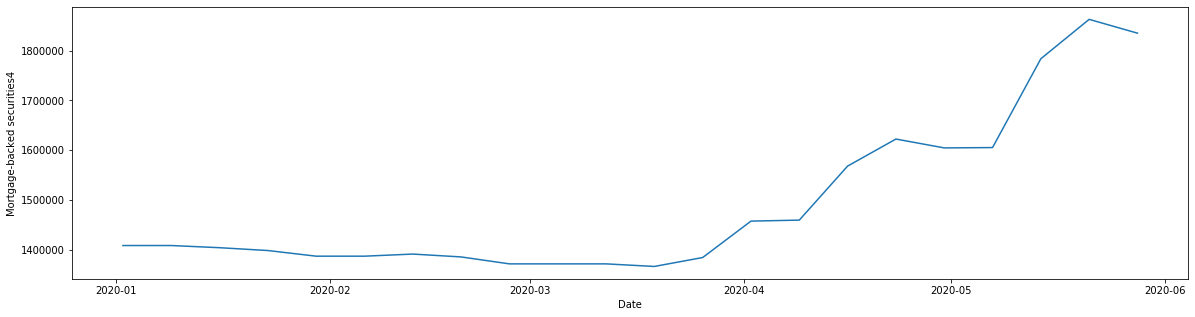

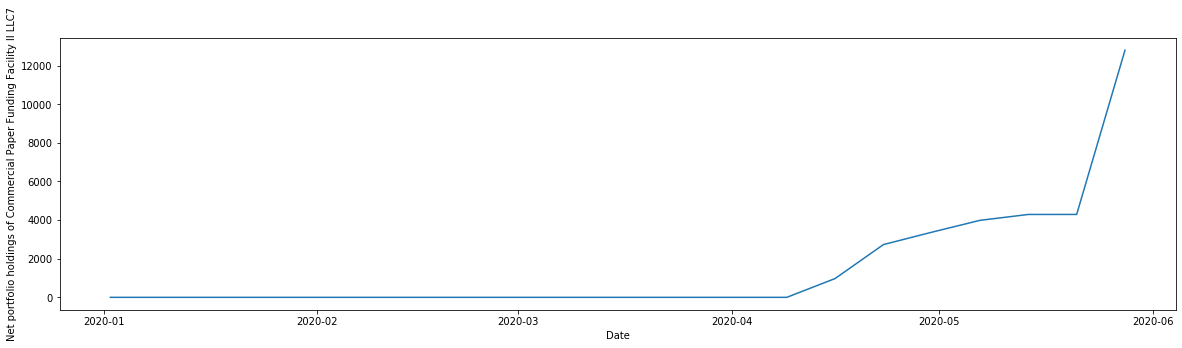

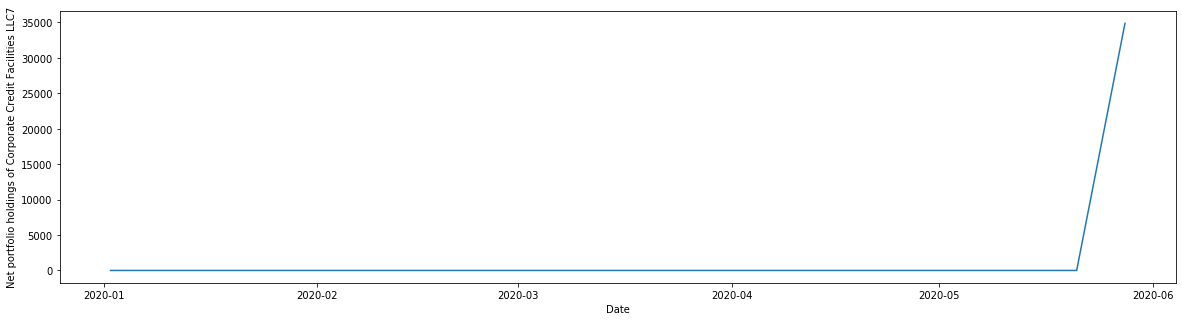

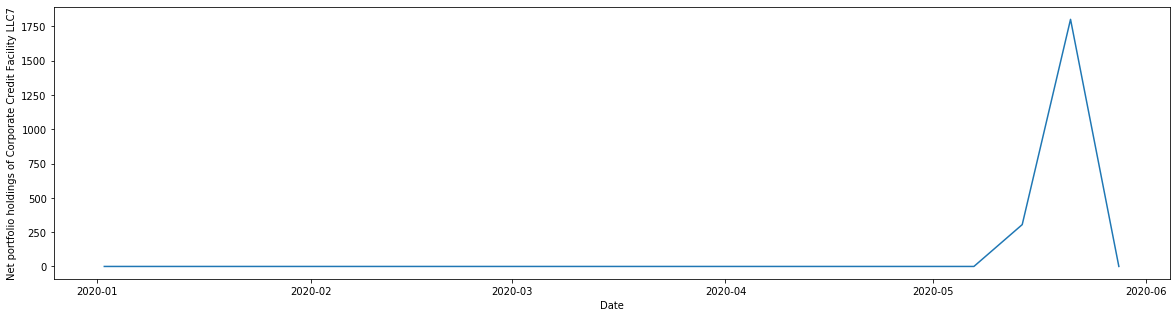

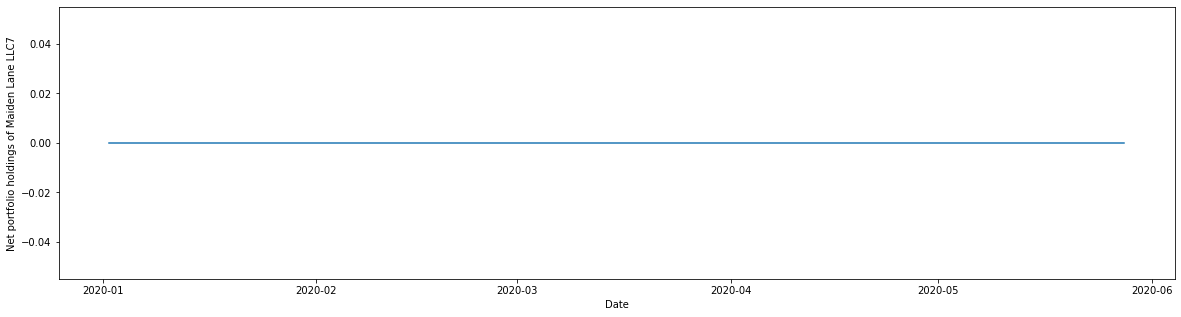

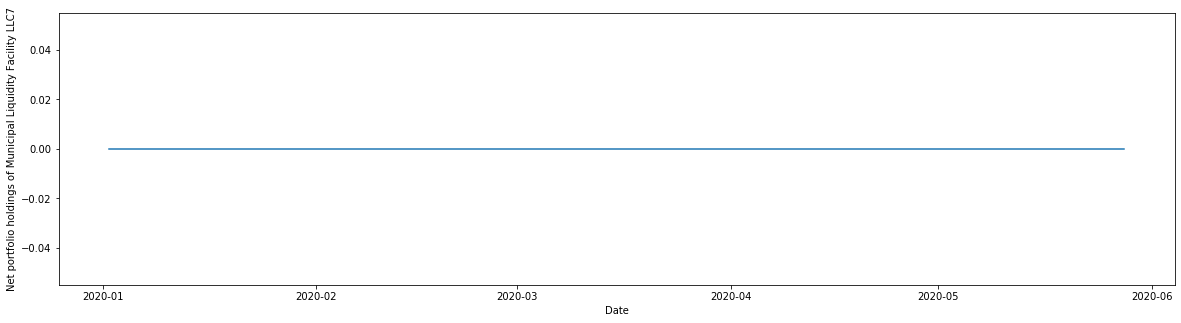

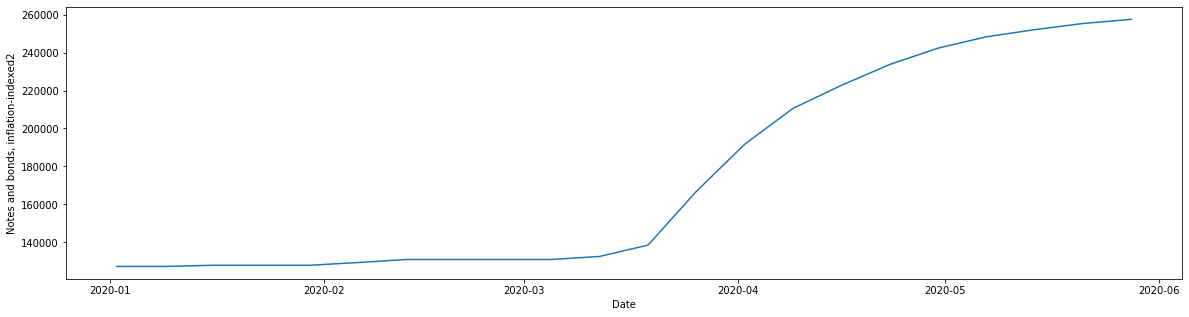

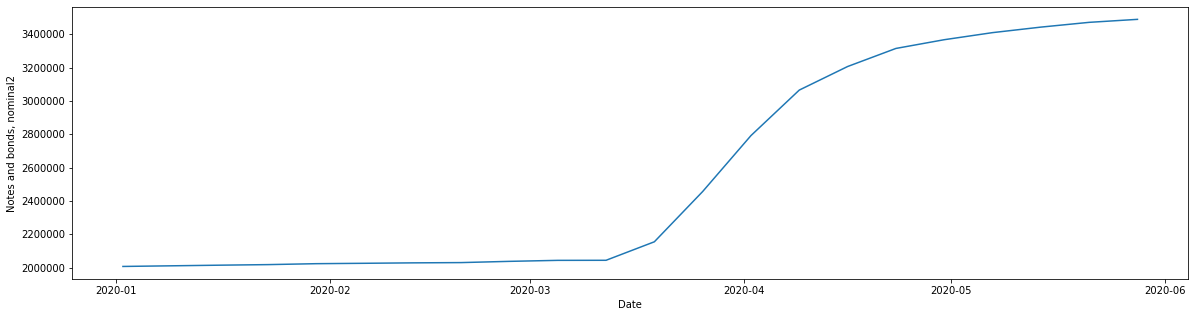

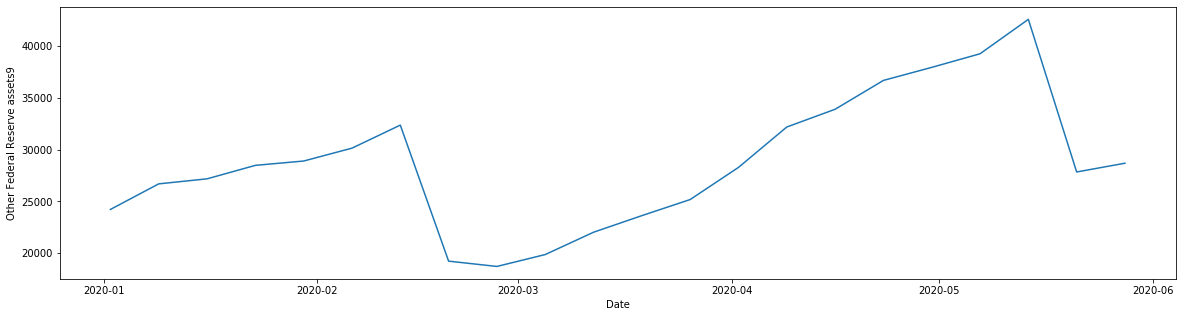

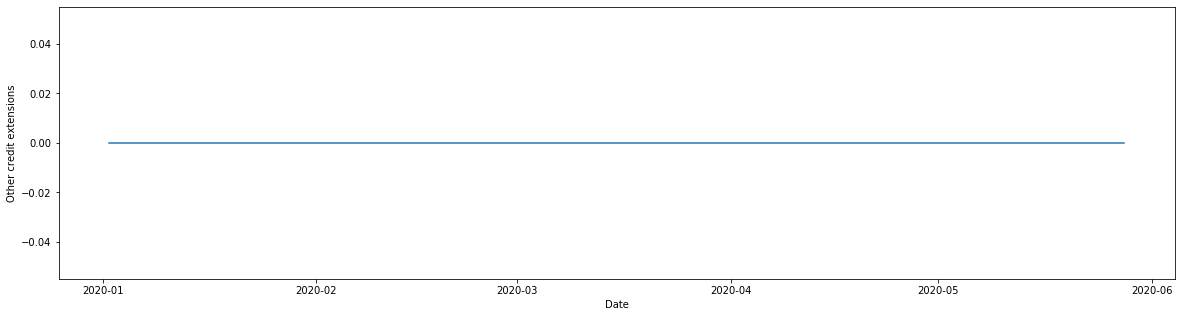

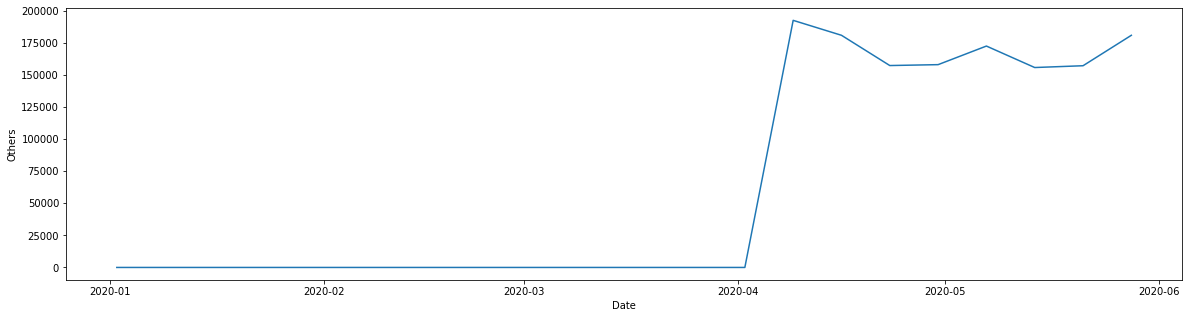

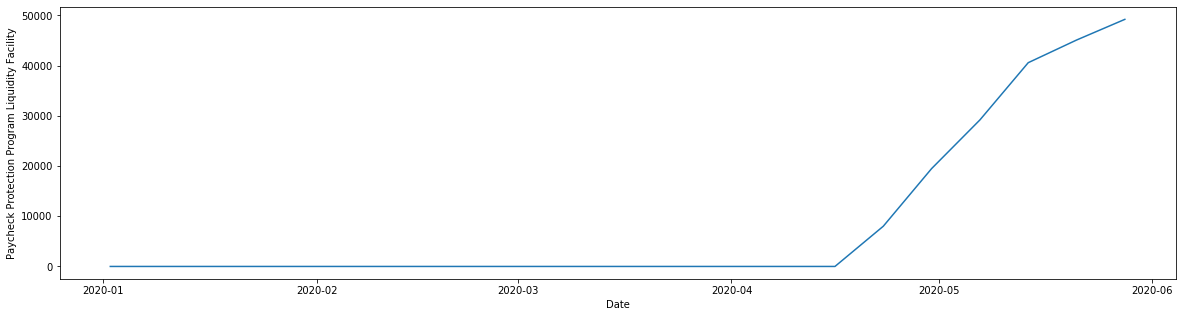

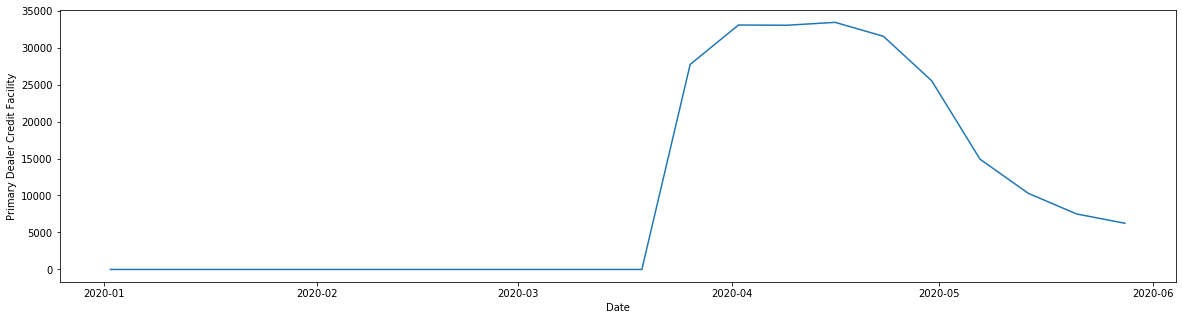

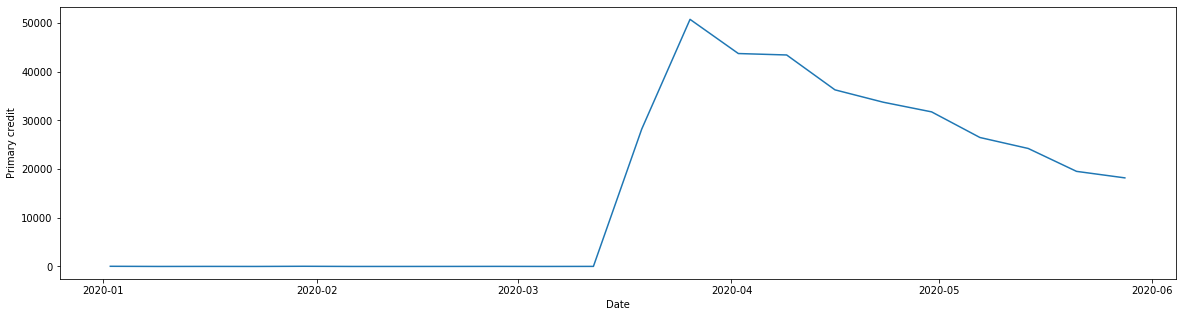

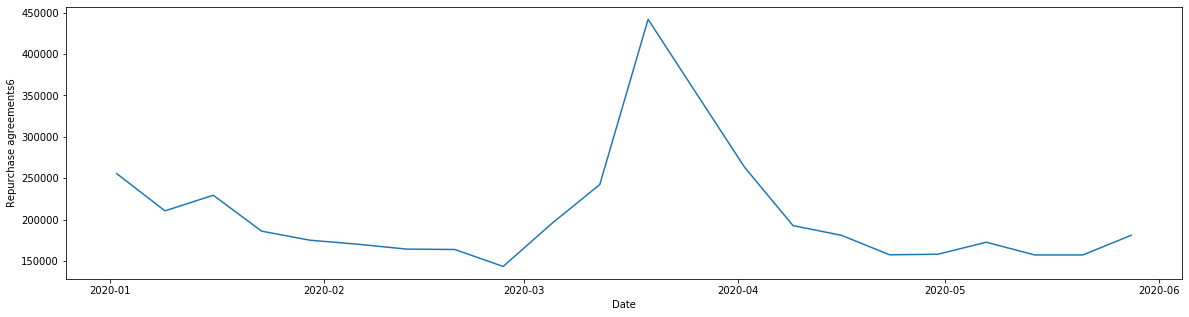

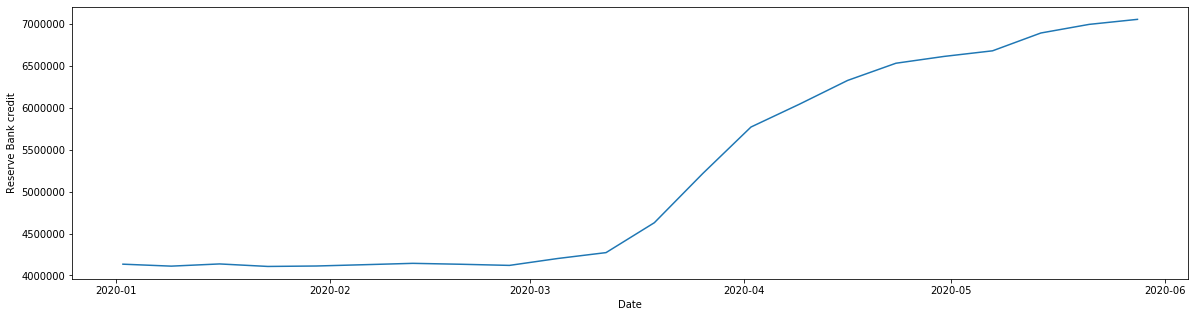

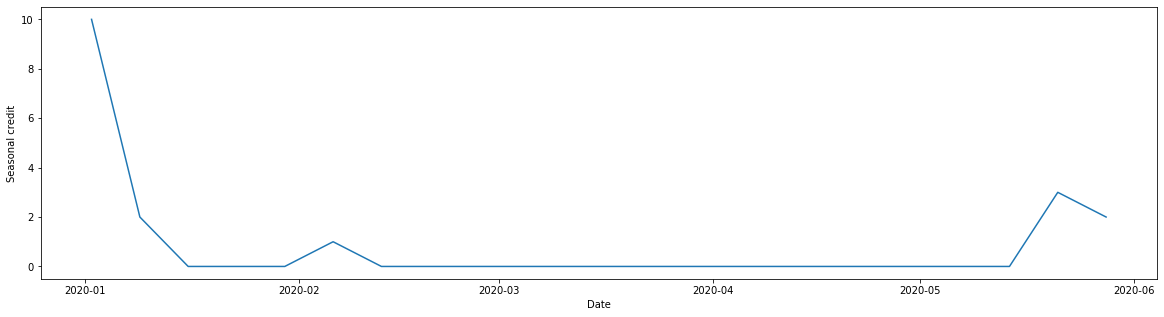

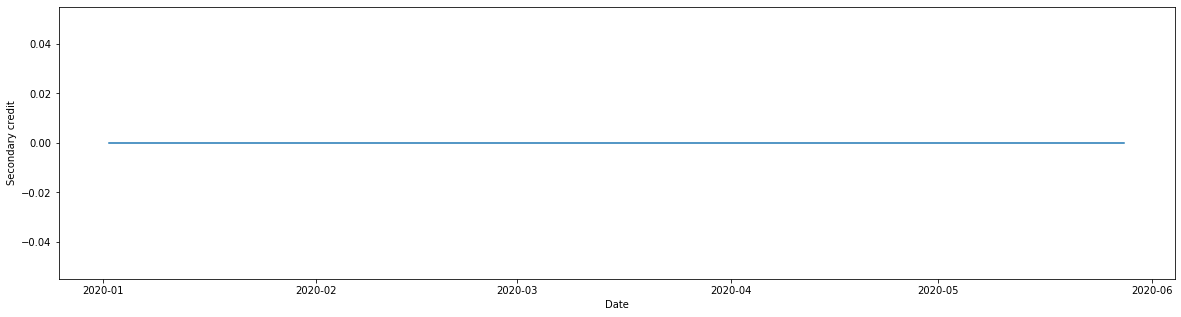

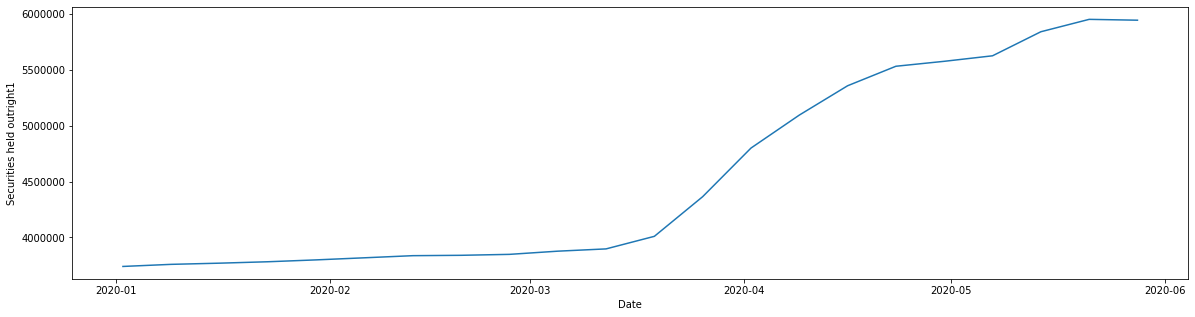

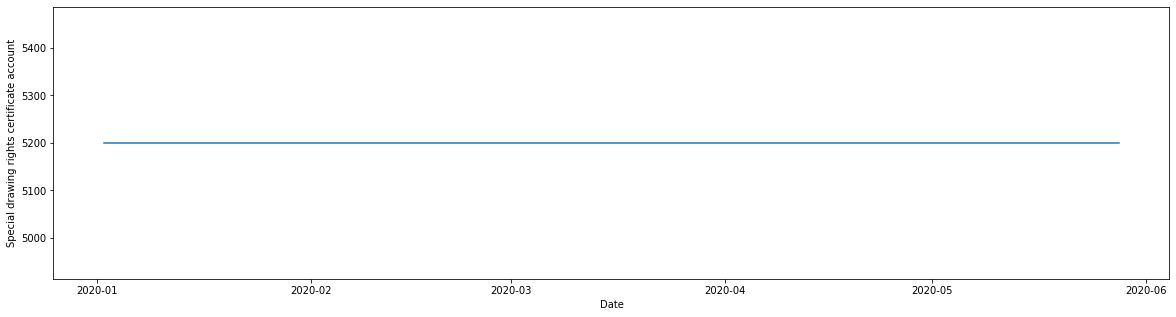

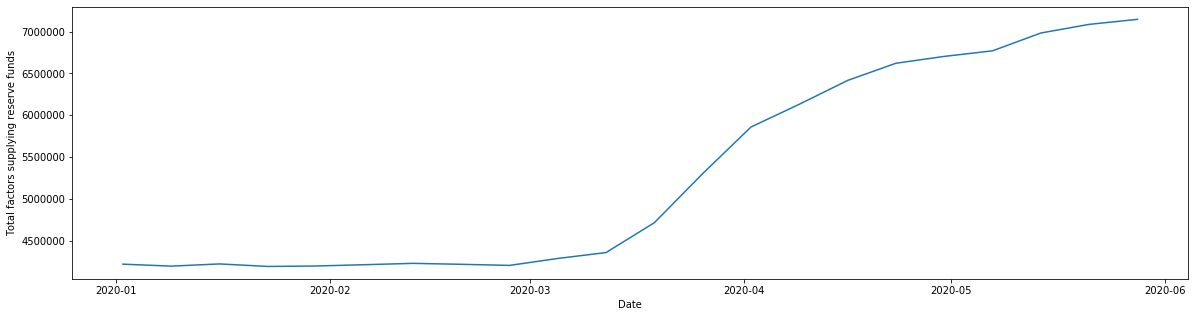

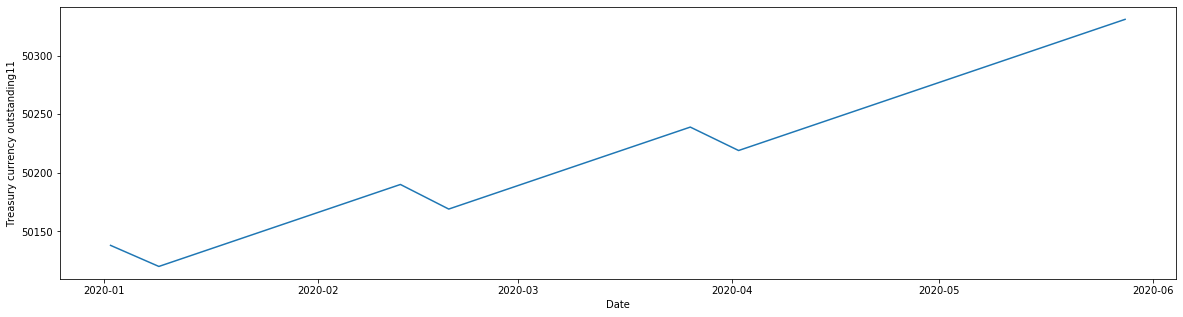

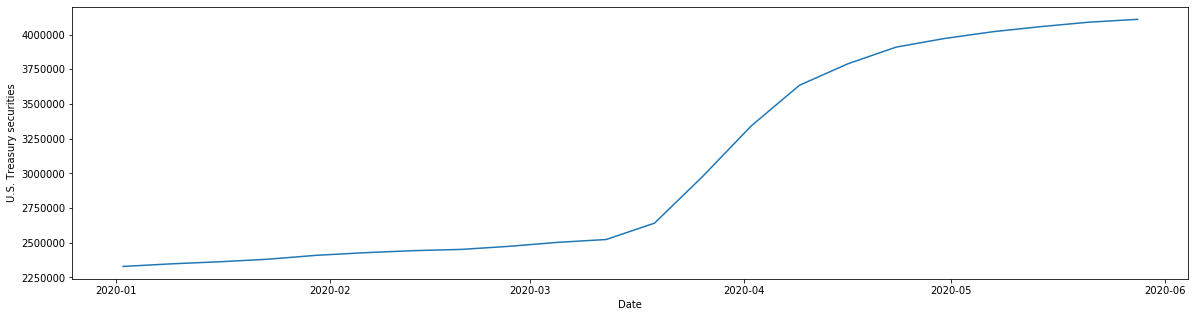

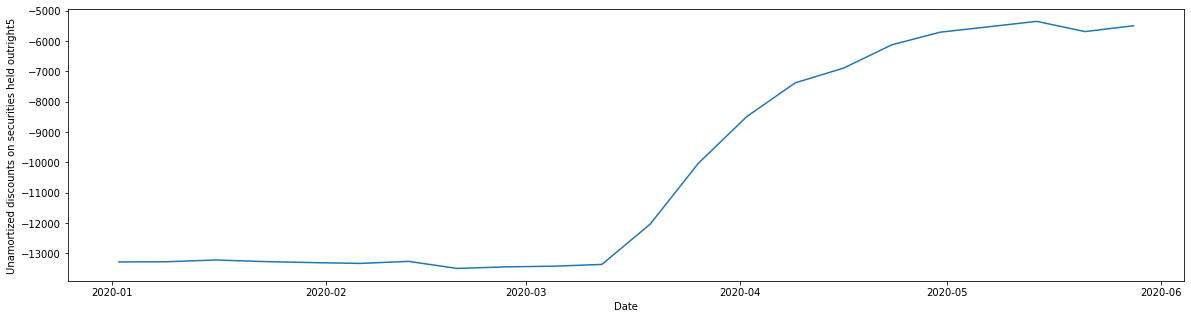

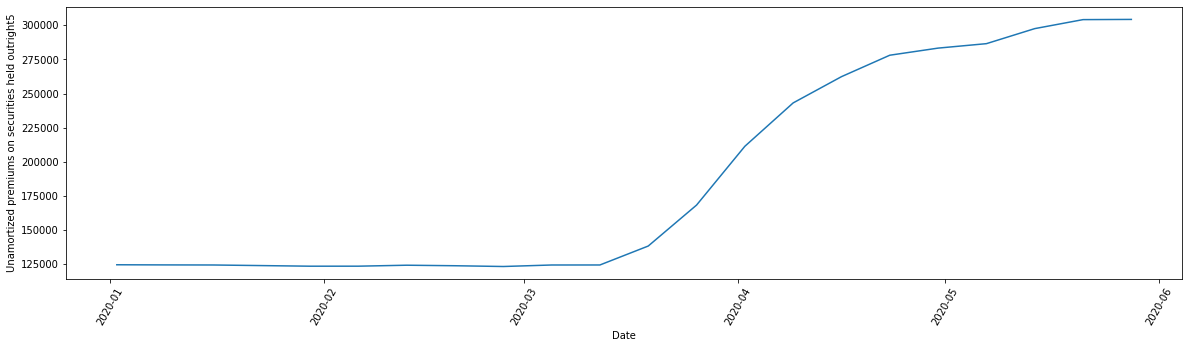

In [361]:
%matplotlib inline
import seaborn as sns
import matplotlib.pylab as plt

f, ax = plt.subplots(figsize=(20,5))
for c in df.columns:
    f, ax = plt.subplots(figsize= (20, 5))
    ax = sns.lineplot(df[c].index, df[c])
plt.xticks(rotation=60)
plt.show()

In [346]:
df.index

Index(['January 2, 2020', 'January 9, 2020', 'January 16, 2020',
       'January 23, 2020', 'January 30, 2020', 'February 6, 2020',
       'February 13, 2020', 'February 20, 2020', 'February 27, 2020',
       'March 5, 2020', 'March 12, 2020', 'March 19, 2020', 'March 26, 2020',
       'April 2, 2020', 'April 9, 2020', 'April 16, 2020', 'April 23, 2020',
       'April 30, 2020', 'May 7, 2020', 'May 14, 2020', 'May 21, 2020',
       'May 28, 2020'],
      dtype='object', name='Date')

In [372]:
df.head()

,Bills2,Central bank liquidity swaps8,Federal agency debt securities2,Float,Foreign currency denominated assets10,Foreign official,Gold stock,Inflation compensation3,Loans,Money Market Mutual Fund Liquidity Facility,...,Reserve Bank credit,Seasonal credit,Secondary credit,Securities held outright1,Special drawing rights certificate account,Total factors supplying reserve funds,Treasury currency outstanding11,U.S. Treasury securities,Unamortized discounts on securities held outright5,Unamortized premiums on securities held outright5
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,169525,3728,2347,-643,20792,0,11041,25474,42,0,...,4134215,10,0,3739957,5200,4221387,50138,2328933,-13284,124577
2020-01-09,184527,3728,2347,-124,20632,0,11041,25453,2,0,...,4110819,2,0,3758738,5200,4197813,50120,2347714,-13278,124474
2020-01-16,195029,59,2347,-60,20607,0,11041,25485,9,0,...,4137142,0,0,3769300,5200,4224124,50134,2362635,-13221,124410
2020-01-23,210031,54,2347,-158,20526,0,11041,25467,0,0,...,4107163,0,0,3782010,5200,4194078,50148,2381020,-13272,123974
2020-01-30,232534,51,2347,-675,20499,0,11041,25448,34,0,...,4112398,0,0,3798743,5200,4199300,50162,2409108,-13306,123527


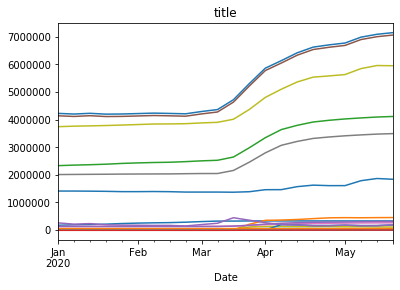

In [374]:
df.plot(legend=False)
plt.title('title')
plt.show()

# trying id get

In [67]:
#count how many tables exist
len(bs.select('table'))
#start index is 1 for table
#start index is 0 for columns
#data columns are by last column to avoid headers creation gimmicks
tables_bs = bs.select('table')
try:
    print(tables_bs[1].select('th')[-1].attrs['id'])
except:
    #index out of bounds reached for second []
    print('fail') 


t2r34


In [144]:
#identify what we want from each table
dids = {}
tables_bs = bs.select('table')
maxtable = len(tables_bs)
#starts at table 1 but tables_bs is 0 indexed
curtable = int(tables_bs[0].find('th').attrs['id'].strip('t').split('r')[0])

features = {}

while curtable <= maxtable:
    #last table row
    #all data elements in row
    columns = len(tables_bs[curtable - 1].findAll('tr')[-1].findAll('td'))
    rows = len(tables_bs[curtable -1].findAll('tr'))
    dids[curtable] = []
    #get all features for table
    features[curtable] = tables_bs[curtable - 1].findAll('th', {'headers' : 't{}c0'.format(curtable)})
    rows = len(features[curtable])
    #get all data for table
#     for column in range(1, columns):
#         #append column of data to list for that table
#         dids[curtable].append(bs.select('#t{}c{}'.format(curtable, column)))
    
    curtable += 1
    
    

0
34
16
0
8
0
0
16
0
8
0
27
21
0
14
20
0
12
0


In [217]:
#create cleaned features from features
dataM = data[1:] # skip the date entry
runningindex = 0
cleaned_features = {}
for key in features:
    #print(key)
    cleaned_features[key] = []
    for value in features[key]:
        if (len(value.text) != 0): #not empty row
            cleaned_features[key].append(value.text)
            #print('-- {} : {} --'.format(value.text, dataM[4 * index + 3].text.strip()))
        else: #do nothing
            continue

#create df from cleaned_features
dvals = {}
dfvals = {'Date' : data[0].text.strip()}
keys = cleaned_features[2] #table2
for index, key in enumerate(keys):
    #for index, value in enumerate(cleaned_features[key]): #value = name of feature
    #    print(dataM[4 * index + 3])
    #    print(type(value))
    dfvals[key] = [dataM[4 * index + 3].text.strip()]
    runningindex += 4 * len(cleaned_features[2])
df = pd.DataFrame(data=dfvals).set_index('Date')

In [218]:
df.head()

,Reserve Bank credit,Securities held outright1,U.S. Treasury securities,Bills2,"Notes and bonds, nominal2","Notes and bonds, inflation-indexed2",Inflation compensation3,Federal agency debt securities2,Mortgage-backed securities4,Unamortized premiums on securities held outright5,...,Net portfolio holdings of Commercial Paper Funding Facility II LLC7,Net portfolio holdings of Corporate Credit Facility LLC7,Float,Central bank liquidity swaps8,Other Federal Reserve assets9,Foreign currency denominated assets10,Gold stock,Special drawing rights certificate account,Treasury currency outstanding11,Total factors supplying reserve funds
Date,,,,,,,,,,,,,,,,,,,,,
"May 14, 2020","6,895,709","5,843,376","4,057,268","326,044","3,442,616","252,016","36,592","2,347","1,783,761","297,516",...,"4,292",305,-239,"440,934","42,599","20,484","11,041","5,200","50,303","6,982,738"


In [193]:
dfvals

{'Date': 'May 28, 2020',
 'Reserve Bank credit': '181,101',
 'Securities held outright1': '181,101',
 'U.S. Treasury securities': '181,101',
 'Bills2': '181,101',
 'Notes and bonds, nominal2': '181,101',
 'Notes and bonds, inflation-indexed2': '181,101',
 'Inflation compensation3': '181,101',
 'Federal agency debt securities2': '181,101',
 'Mortgage-backed securities4': '181,101',
 'Unamortized premiums on securities held outright5': '181,101',
 'Unamortized discounts on securities held outright5': '181,101',
 'Repurchase agreements6': '181,101',
 'Foreign official': '181,101',
 'Others': '181,101',
 'Loans': '181,101',
 'Primary credit': '181,101',
 'Secondary credit': '181,101',
 'Seasonal credit': '181,101',
 'Primary Dealer Credit Facility': '181,101',
 'Money Market Mutual Fund Liquidity Facility': '181,101',
 'Paycheck Protection Program Liquidity Facility ': '181,101',
 'Other credit extensions': '181,101',
 'Net portfolio holdings of Commercial Paper Funding Facility II LLC7': 

In [184]:
cleaned_features[2]

['Reserve Bank credit',
 'Securities held outright1',
 'U.S. Treasury securities',
 'Bills2',
 'Notes and bonds, nominal2',
 'Notes and bonds, inflation-indexed2',
 'Inflation compensation3',
 'Federal agency debt securities2',
 'Mortgage-backed securities4',
 'Unamortized premiums on securities held outright5',
 'Unamortized discounts on securities held outright5',
 'Repurchase agreements6',
 'Foreign official',
 'Others',
 'Loans',
 'Primary credit',
 'Secondary credit',
 'Seasonal credit',
 'Primary Dealer Credit Facility',
 'Money Market Mutual Fund Liquidity Facility',
 'Paycheck Protection Program Liquidity Facility ',
 'Other credit extensions',
 'Net portfolio holdings of Commercial Paper Funding Facility II LLC7',
 'Net portfolio holdings of Corporate Credit Facilities LLC7',
 'Net portfolio holdings of Municipal Liquidity Facility LLC7',
 'Float',
 'Central bank liquidity swaps8',
 'Other Federal Reserve assets9',
 'Foreign currency denominated assets10',
 'Gold stock',
 'Spe

In [89]:
dids[2][0][0].text

'Averages of daily figures'

In [16]:
bs.findAll('th', {'headers' : 't2c0'})

[<th headers="t2c0" id="t2r1" style="font-family:Arial;font-size:8pt;vertical-align:bottom;border-top:solid 1px black;border-right:solid 1px black;"><p>Reserve Bank credit</p></th>,
 <th headers="t2c0 t2r1" id="t2r2" style="font-family:Arial;font-size:8pt;vertical-align:bottom;border-right:solid 1px black;padding-left:0.7184em;"><p>Securities held outright<sup>1</sup></p></th>,
 <th headers="t2c0 t2r1 t2r2" id="t2r3" style="font-family:Arial;font-size:8pt;vertical-align:bottom;border-right:solid 1px black;padding-left:1.4571em;"><p>U.S. Treasury securities</p></th>,
 <th headers="t2c0 t2r1 t2r2 t2r3" id="t2r4" style="font-family:Arial;font-size:8pt;vertical-align:bottom;border-right:solid 1px black;padding-left:2.1878em;"><p>Bills<sup>2</sup></p></th>,
 <th headers="t2c0 t2r1 t2r2 t2r3" id="t2r5" style="font-family:Arial;font-size:8pt;vertical-align:bottom;border-right:solid 1px black;padding-left:2.1878em;"><p>Notes and bonds, nominal<sup>2</sup></p></th>,
 <th headers="t2c0 t2r1 t2r2

In [15]:
tablenum = 2
bs.findAll('th', {'headers' : 't{}c0'.format(tablenum)})

[<th headers="t2c0" id="t2r1" style="font-family:Arial;font-size:8pt;vertical-align:bottom;border-top:solid 1px black;border-right:solid 1px black;"><p>Reserve Bank credit</p></th>,
 <th headers="t2c0 t2r1" id="t2r2" style="font-family:Arial;font-size:8pt;vertical-align:bottom;border-right:solid 1px black;padding-left:0.7184em;"><p>Securities held outright<sup>1</sup></p></th>,
 <th headers="t2c0 t2r1 t2r2" id="t2r3" style="font-family:Arial;font-size:8pt;vertical-align:bottom;border-right:solid 1px black;padding-left:1.4571em;"><p>U.S. Treasury securities</p></th>,
 <th headers="t2c0 t2r1 t2r2 t2r3" id="t2r4" style="font-family:Arial;font-size:8pt;vertical-align:bottom;border-right:solid 1px black;padding-left:2.1878em;"><p>Bills<sup>2</sup></p></th>,
 <th headers="t2c0 t2r1 t2r2 t2r3" id="t2r5" style="font-family:Arial;font-size:8pt;vertical-align:bottom;border-right:solid 1px black;padding-left:2.1878em;"><p>Notes and bonds, nominal<sup>2</sup></p></th>,
 <th headers="t2c0 t2r1 t2r2

In [293]:
data[337]

<p>Guaranteed by Fannie Mae, Freddie Mac, and Ginnie Mae. The current face value shown is the remaining principal balance of the securities.</p>

In [265]:
#133, 188
#204 7 * 12
count

204

In [20]:
table2vals = data[133:189]
table3vals = data[204:236]
table4vals = data[240:324]
table5vals = data[332:337]
#table6vals = data

In [260]:
count

188

## Row Names

In [ ]:
#td id names
#t2r1
#t2r2
#t2r3
#...
#t2r34
#t3r1
#
#headers tXc0


In [5]:
tablenum = 2
table1_headers = bs.findAll('th', {'headers' : 't{}c0'.format(tablenum)})

In [13]:
desiredtables = [2, 3, 5, 8, 10, 12, 13, 15, 16, 18]
tableHeaders = []
for tablenum in desiredtables:
    tableHeaders.append(bs.findAll('th', {'headers' : 't{}c0'.format(tablenum)}))

## create dict for data

## table 1

In [3]:
type(data)

list

In [ ]:
df_table3 = createTable(table3vals, tableHeaders[2])


In [81]:
tableHeaders[2][0].select('p')[0].text

'Securities held in custody for foreign official and international accounts'

['3,391,236', '+\xa0\xa0\xa0\xa02,828', '-\xa0\xa0\xa072,101', '3,384,052']

In [100]:
def createTable(data, headers, columns=columnNames):
    table = []
    table1 = {}
    c = 0
    for x in headers:
        try:
            vals = []
            for num, col in enumerate(columns):
                vals.append(data[c * len(columns) + num ].text.strip())
            table1[x.select('p')[0].text] = vals
            c += 1
        except:
            #can't use enumerate since ('p')[0] may be out of index
            continue
    df = pd.DataFrame(table1).T
    df.columns = columns
    return df

In [7]:
table = []
table1 = {}
count = 0
for x in table1_headers:
    try: #index out of range for no p elements in stuffs
        table1[x.select('p')[0].text] = [data[count * 4 + 1].text.strip(),
                                        data[count * 4 + 2].text.strip(),
                                        data[count * 4 + 3].text.strip(),
                                        data[count * 4 + 4].text.strip()]
        count += 1
    except:
        #can't use enumerate since ('p')[0] may fail
        continue

In [8]:
df_table1 = pd.DataFrame(table1).T

In [9]:
columnNames = ['Week Ended May 27, 2020',
              'Change from May 20, 2020',
              'Change from May 29, 2020',
              'Wednesday May 27, 2020']

In [10]:
df_table1.columns = columnNames

## table 2

In [83]:
table2 = {}
rowNames2 = []
count = 0
for x in tableHeaders[1]:
    try:
        table2[x.select('p')[0].text] = [table2vals[count * 4].text.strip(),
                                            table2vals[count * 4 + 1].text.strip(),
                                            table2vals[count * 4 + 2].text.strip(),
                                            table2vals[count * 4 + 3].text.strip()]
        count += 1
    except:
            continue
        

In [19]:
count = 0
table2[x.select('p')[0].text] = [table2vals[count * 4 + 1].text.strip(),
                                    table2vals[count * 4 + 2].text.strip(),
                                    table2vals[count * 4 + 3].text.strip(),
                                    table2vals[count * 4 + 4].text.strip()]

NameError: name 'table2vals' is not defined

In [84]:
df_table2 = pd.DataFrame(table2).T

In [85]:
df_table2 = pd.DataFrame(table2).T
df_table2.columns = columnNames

In [86]:
df_table2.head()

,"Week Ended May 27, 2020","Change from May 20, 2020","Change from May 29, 2020","Wednesday May 27, 2020"
Currency in circulation11,"1,944,218","+ 10,951","+ 206,641","1,948,196"
Reverse repurchase agreements12,"245,506","- 15,342","- 21,894","243,976"
Foreign official and international accounts,"244,887","- 13,964","- 17,870","239,650"
Others,619,"- 1,378","- 4,024","4,326"
Treasury cash holdings,239,- 34,- 31,207


## table 3


In [90]:
tableHeaders[2]

[<th headers="t5c0" id="t5r1" style="font-family:Arial;font-size:8pt;vertical-align:bottom;border-top:solid 1px black;border-right:solid 1px black;padding-left:1.8245em;text-indent:-1.8245em;"><p>Securities held in custody for foreign official and international accounts</p></th>,
 <th headers="t5c0 t5r1" id="t5r2" style="font-family:Arial;font-size:8pt;vertical-align:bottom;border-right:solid 1px black;padding-left:0.7184em;"><p>Marketable U.S. Treasury securities<sup>1</sup></p></th>,
 <th headers="t5c0 t5r1" id="t5r3" style="font-family:Arial;font-size:8pt;vertical-align:bottom;border-right:solid 1px black;padding-left:0.7184em;"><p>Federal agency debt and mortgage-backed securities<sup>2</sup></p></th>,
 <th headers="t5c0 t5r1" id="t5r4" style="font-family:Arial;font-size:8pt;vertical-align:bottom;border-right:solid 1px black;padding-left:0.7184em;"><p>Other securities<sup>3</sup></p></th>,
 <th headers="t5c0" id="t5r5" style="font-family:Arial;font-size:8pt;vertical-align:bottom;bo

In [95]:
df_table3 = createTable(table3vals, tableHeaders[2])

In [97]:
df_table3.tail()

,"Week Ended May 27, 2020","Change from May 20, 2020","Change from May 29, 2020","Wednesday May 27, 2020"
Other securities3,"85,420",+ 475,"+ 9,581","85,447"
Securities lent to dealers,"32,694",+ 347,"+ 11,237","32,934"
Overnight facility4,"32,694",+ 347,"+ 11,237","32,934"
U.S. Treasury securities,"32,694",+ 347,"+ 11,237","32,934"
Federal agency debt securities,0,0,0,0


In [131]:
assliabNames = ['Within 15 days',
               '16 to 90 days',
               '91 days to 1 year',
               'Over 1 year to 5 years',
               'Over 5 years to 10 years',
               'Over 10 years',
               'All']
df_table4 = createTable(table4vals,tableHeaders[3], columns = assliabNames)

6
13
20
27
34
41
48
55
62
69
76
83
fail at 12
fail at 13
fail at 14
fail at 15


In [115]:
7 * 12

84

In [114]:
len(table4vals), len(assliabNames)

(84, 7)

In [123]:
allvals = []
for x in range(int(len(table4vals) / len(assliabNames))):
    vals = []
    for num, col in enumerate(assliabNames):
        vals.append(table4vals[x * len(assliabNames) + num ].text.strip())
    allvals.append(vals)
        

In [130]:
def createTable(data, headers, columns=columnNames):
    table = []
    table1 = {}
    for c, x in enumerate(headers):
        try:
            vals = []
            for num, col in enumerate(columns):
                vals.append(data[c * len(columns) + num ].text.strip())
            table1[x.select('p')[0].text] = vals
            print(c * len(columns) + num)
        except:
            print('fail at {}'.format(c))
            #can't use enumerate since ('p')[0] may be out of index
            continue
    df = pd.DataFrame(table1).T
    df.columns = columns
    return df

In [124]:
allvals

[['9,777', '36,411', '11,497', '49,211', '0', '...', '106,896'],
 ['55,608',
  '279,039',
  '564,220',
  '1,577,552',
  '719,915',
  '913,177',
  '4,109,512'],
 ['-\xa0\xa0\xa011,251',
  '+\xa0\xa0\xa0\xa04,864',
  '+\xa0\xa0\xa0\xa06,377',
  '+\xa0\xa0\xa0\xa09,486',
  '+\xa0\xa0\xa0\xa08,657',
  '+\xa0\xa0\xa0\xa02,047',
  '+\xa0\xa0\xa020,181'],
 ['0', '0', '0', '0', '1,436', '911', '2,347'],
 ['0', '0', '0', '0', '0', '0', '0'],
 ['0', '0', '4', '2,217', '80,749', '1,752,140', '1,835,110'],
 ['0',
  '0',
  '-\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa01',
  '-\xa0\xa0\xa0\xa0\xa0\xa0\xa074',
  '-\xa0\xa0\xa0\xa01,156',
  '-\xa0\xa0\xa026,499',
  '-\xa0\xa0\xa027,731'],
 ['0', '4,255', '0', '...', '...', '...', '4,255'],
 ['139,551', '41,550', '...', '...', '...', '...', '181,101'],
 ['126,741', '322,205', '0', '0', '0', '0', '448,946'],
 ['243,976', '0', '...', '...', '...', '...', '243,976'],
 ['0', '0', '0', '...', '...', '...', '0']]

In [107]:
table4vals

[<p>     9,777</p>,
 <p>    36,411</p>,
 <p>    11,497</p>,
 <p>    49,211</p>,
 <p>         0</p>,
 <p>...</p>,
 <p>   106,896</p>,
 <p>    55,608</p>,
 <p>   279,039</p>,
 <p>   564,220</p>,
 <p> 1,577,552</p>,
 <p>   719,915</p>,
 <p>   913,177</p>,
 <p> 4,109,512</p>,
 <p>-   11,251</p>,
 <p>+    4,864</p>,
 <p>+    6,377</p>,
 <p>+    9,486</p>,
 <p>+    8,657</p>,
 <p>+    2,047</p>,
 <p>+   20,181</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>     1,436</p>,
 <p>       911</p>,
 <p>     2,347</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>         4</p>,
 <p>     2,217</p>,
 <p>    80,749</p>,
 <p> 1,752,140</p>,
 <p> 1,835,110</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>-        1</p>,
 <p>-       74</p>,
 <p>-    1,156</p>,
 <p>-   26,499</p>,
 <p>-   27,731</p>,
 <p>         0</p>,
 <p>   

In [111]:
table4vals[51]

<p>         0</p>

In [127]:
df_table4

,Within 15 days,16 to 90 days,91 days to 1 year,Over 1 year to 5 years,Over 5 years to 10 years,Over 10 years,All
Loans1,"9,777","36,411","11,497","49,211",0,...,"106,896"
U.S. Treasury securities2,"55,608","279,039","564,220","1,577,552","719,915","913,177","4,109,512"
Holdings,"139,551","41,550",...,...,...,...,"181,101"
Weekly changes,"126,741","322,205",0,0,0,0,"448,946"
Federal agency debt securities3,0,0,0,0,0,0,0
Mortgage-backed securities4,0,"4,255",0,...,...,...,"4,255"
Commercial paper held by Commercial,"243,976",0,...,...,...,...,"243,976"
Paper Funding Facility II LLC5,0,0,0,...,...,...,0


In [74]:
tableHeaders[2]

[<th headers="t5c0" id="t5r1" style="font-family:Arial;font-size:8pt;vertical-align:bottom;border-top:solid 1px black;border-right:solid 1px black;padding-left:1.8245em;text-indent:-1.8245em;"><p>Securities held in custody for foreign official and international accounts</p></th>,
 <th headers="t5c0 t5r1" id="t5r2" style="font-family:Arial;font-size:8pt;vertical-align:bottom;border-right:solid 1px black;padding-left:0.7184em;"><p>Marketable U.S. Treasury securities<sup>1</sup></p></th>,
 <th headers="t5c0 t5r1" id="t5r3" style="font-family:Arial;font-size:8pt;vertical-align:bottom;border-right:solid 1px black;padding-left:0.7184em;"><p>Federal agency debt and mortgage-backed securities<sup>2</sup></p></th>,
 <th headers="t5c0 t5r1" id="t5r4" style="font-family:Arial;font-size:8pt;vertical-align:bottom;border-right:solid 1px black;padding-left:0.7184em;"><p>Other securities<sup>3</sup></p></th>,
 <th headers="t5c0" id="t5r5" style="font-family:Arial;font-size:8pt;vertical-align:bottom;bo

In [103]:
table4vals

[<p>     9,777</p>,
 <p>    36,411</p>,
 <p>    11,497</p>,
 <p>    49,211</p>,
 <p>         0</p>,
 <p>...</p>,
 <p>   106,896</p>,
 <p>    55,608</p>,
 <p>   279,039</p>,
 <p>   564,220</p>,
 <p> 1,577,552</p>,
 <p>   719,915</p>,
 <p>   913,177</p>,
 <p> 4,109,512</p>,
 <p>-   11,251</p>,
 <p>+    4,864</p>,
 <p>+    6,377</p>,
 <p>+    9,486</p>,
 <p>+    8,657</p>,
 <p>+    2,047</p>,
 <p>+   20,181</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>     1,436</p>,
 <p>       911</p>,
 <p>     2,347</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>         4</p>,
 <p>     2,217</p>,
 <p>    80,749</p>,
 <p> 1,752,140</p>,
 <p> 1,835,110</p>,
 <p>         0</p>,
 <p>         0</p>,
 <p>-        1</p>,
 <p>-       74</p>,
 <p>-    1,156</p>,
 <p>-   26,499</p>,
 <p>-   27,731</p>,
 <p>         0</p>,
 <p>   

## cleaning

In [179]:
table1

{'Reserve Bank credit': ['7,059,561',
  '+\xa0\xa0137,525',
  '+3,239,597',
  '7,058,713'],
 'Securities held outright1': ['5,958,725',
  '+\xa0\xa0\xa086,155',
  '+2,279,834',
  '5,946,969'],
 'U.S. Treasury securities': ['4,101,108',
  '+\xa0\xa0\xa027,033',
  '+1,986,418',
  '4,109,512'],
 'Bills2': ['326,044', '0', '+\xa0\xa0325,994', '326,044'],
 'Notes and bonds, nominal2': ['3,481,681',
  '+\xa0\xa0\xa024,558',
  '+1,505,116',
  '3,489,174'],
 'Notes and bonds, inflation-indexed2': ['256,594',
  '+\xa0\xa0\xa0\xa02,400',
  '+\xa0\xa0141,233',
  '257,451'],
 'Inflation compensation3': ['36,789',
  '+\xa0\xa0\xa0\xa0\xa0\xa0\xa075',
  '+\xa0\xa0\xa014,075',
  '36,843'],
 'Federal agency debt securities2': ['2,347', '0', '0', '2,347'],
 'Mortgage-backed securities4': ['1,855,270',
  '+\xa0\xa0\xa059,122',
  '+\xa0\xa0293,416',
  '1,835,110'],
 'Unamortized premiums on securities held outright5': ['304,609',
  '+\xa0\xa0\xa0\xa04,442',
  '+\xa0\xa0171,805',
  '304,256'],
 'Unamortiz

In [61]:
#remove unic issues '\xa0'
def removeUnicode(x):
    if '\xa0' in str(x):
        return x.replace('\xa0', '')
    else:
        return x
def removePlus(x):
    if '+' in str(x):
        return x.replace('+', '')
    else:
        return x
def removeComma(x):
    if ',' in str(x):
        return x.replace(',', '')
    else:
        return x


In [87]:
#apply methods and change to int
all_dfs = [df_table1, df_table2]
for df in all_dfs:
    for c in columnNames:
        df[c] = df[c].apply(removeUnicode)
        df[c] = df[c].apply(removePlus)
        df[c] = df[c].apply(removeComma)
        df[c] = df[c].astype(int)

In [67]:
df_table1.head()

,"Week Ended May 27, 2020","Change from May 20, 2020","Change from May 29, 2020","Wednesday May 27, 2020"
Reserve Bank credit,7059561,137525,3239597,7058713
Securities held outright1,5958725,86155,2279834,5946969
U.S. Treasury securities,4101108,27033,1986418,4109512
Bills2,326044,0,325994,326044
"Notes and bonds, nominal2",3481681,24558,1505116,3489174


In [88]:
df_table2.head()

,"Week Ended May 27, 2020","Change from May 20, 2020","Change from May 29, 2020","Wednesday May 27, 2020"
Currency in circulation11,1944218,10951,206641,1948196
Reverse repurchase agreements12,245506,-15342,-21894,243976
Foreign official and international accounts,244887,-13964,-17870,239650
Others,619,-1378,-4024,4326
Treasury cash holdings,239,-34,-31,207
